In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

f = pd.read_csv('wine.csv')
df = pd.DataFrame(f)
df.columns = df.columns.str.replace("\t", "").str.strip()

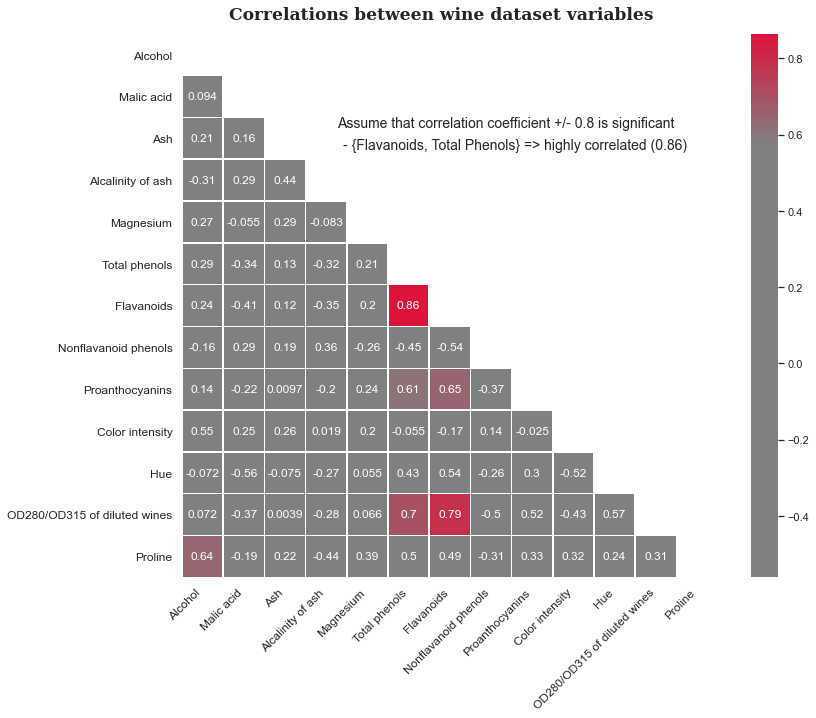

In [34]:
#Q1 Which pair of variables are highly correlated (leave out the class label - first column)?
sns.set(style="white")
q1_df = df.drop(['Type'], axis=1).corr()
upper = np.triu(q1_df) # the upper triangle of a matrix which will be masked 
fig, ax = plt.subplots(figsize=(12,10)) 
#customize heatmap color 
cmap = LinearSegmentedColormap.from_list('Grey-crimson', ['gray','gray', 'gray','gray', 'gray','crimson'])
sns.heatmap(q1_df, annot=True, cmap=cmap, mask=upper, linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
fig.text(0.18, 0.90, "Correlations between wine dataset variables", fontsize=17, fontweight='bold', fontfamily='serif')

plt.text(x=0.50, y=0.75, s= "Assume that correlation coefficient +/- 0.8 is significant", fontsize=14, ha="center", transform=fig.transFigure)
plt.text(x=0.51, y=0.72, s= "- {Flavanoids, Total Phenols} => highly correlated (0.86)", fontsize=14, ha="center", transform=fig.transFigure)
plt.show()

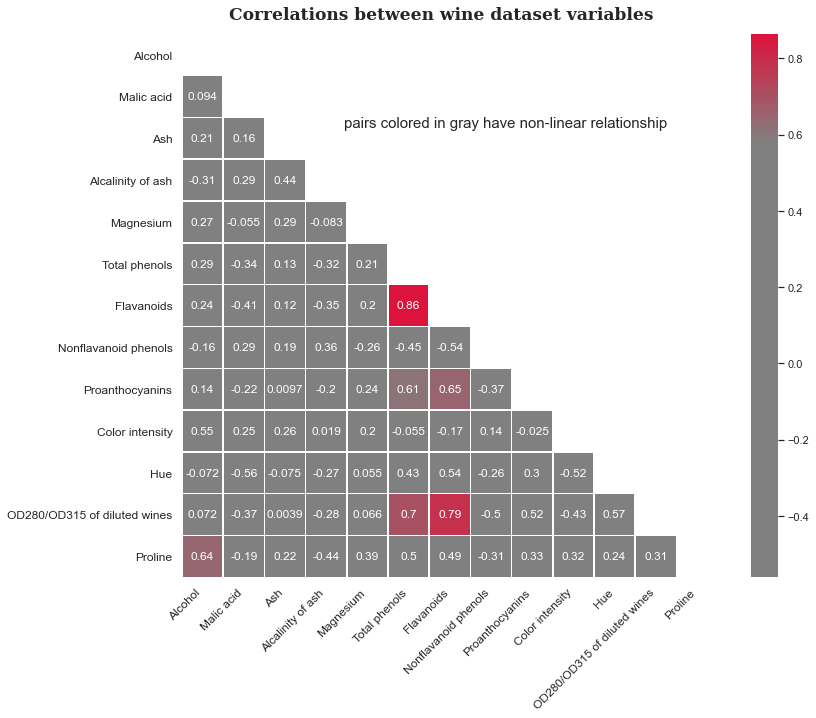

In [35]:
#Q2 Are there any pair of variables that have a non-linear relationship?
sns.set(style="white")
q1_df = df.drop(['Type'], axis=1).corr()
upper = np.triu(q1_df) # the upper triangle of a matrix which will be masked 
fig, ax = plt.subplots(figsize=(12,10)) 
#customize heatmap color 
cmap = LinearSegmentedColormap.from_list('Grey-crimson', ['gray','gray', 'gray','gray', 'gray','crimson'])
sns.heatmap(q1_df, annot=True, cmap=cmap, mask=upper, linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
fig.text(0.18, 0.90, "Correlations between wine dataset variables", fontsize=17, fontweight='bold', fontfamily='serif')
plt.text(x=0.50, y=0.75, s= "pairs colored in gray have non-linear relationship", fontsize=15, ha="center", transform=fig.transFigure)
plt.show()

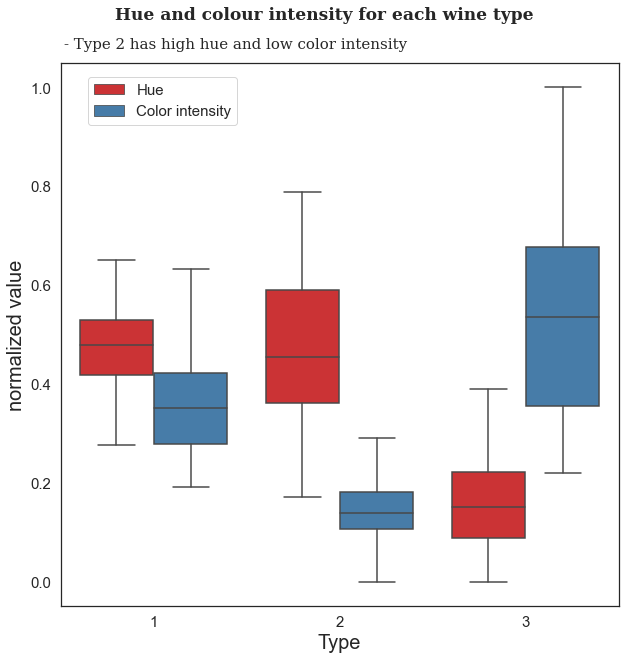

In [36]:
#Q3 When comparing wine cultivar type 1,2, and 3, Do any of the type(s) have data points with high hue and low colour intensity?
pd.options.mode.chained_assignment = None 
q3_df = df[['Type','Hue', 'Color intensity']]
cols_to_norm = ['Hue', 'Color intensity']
q3_df[cols_to_norm] = q3_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
q3_df = pd.melt(q3_df, id_vars='Type', value_vars=['Hue', 'Color intensity'])
fig, ax = plt.subplots(figsize=(10,10)) 
b = sns.boxplot(x='Type', y='value', data=q3_df, showfliers=False, hue='variable', palette="Set1")
plt.legend(bbox_to_anchor=(0.05,0.93), loc="center left", borderaxespad=0, prop={'size': 15})
fig.text(0.2, 0.94, "Hue and colour intensity for each wine type", fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.90, "- Type 2 has high hue and low color intensity ", fontsize=15, fontfamily='serif')

b.set_xlabel("Type",fontsize=20)
b.set_ylabel("normalized value",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

Text(5, 5, 'box plots for each wine dataset attribute')

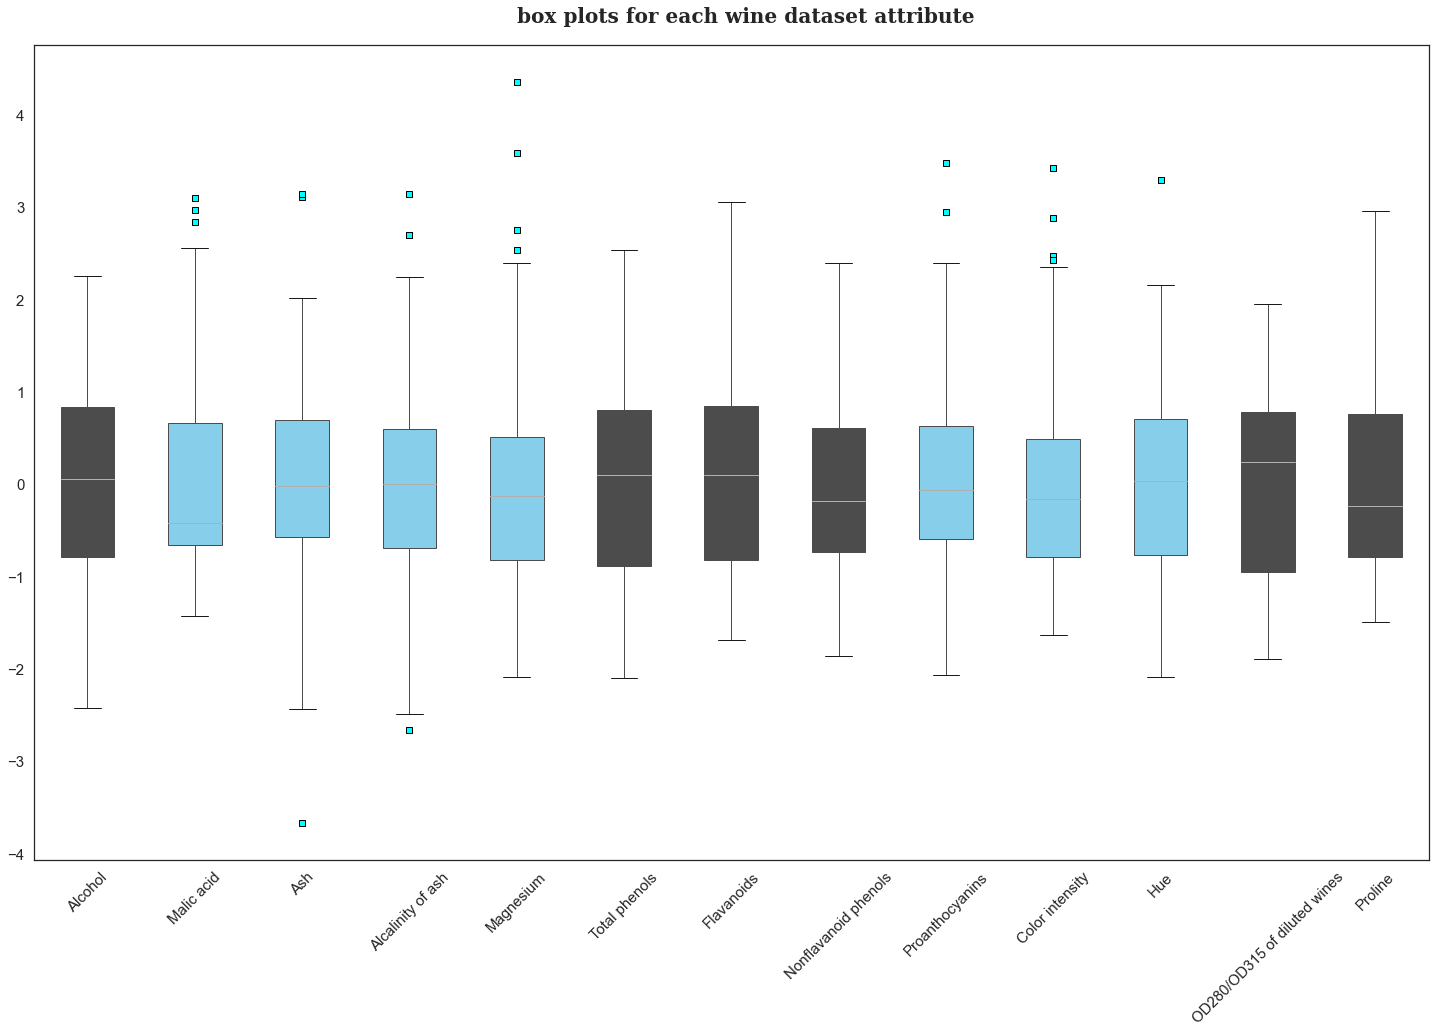

In [37]:
#Q4 Create box plots for each feature. Which attirubutes have outliers?
import matplotlib
q4_df = df.drop(['Type'], axis=1)
# fig, ax = plt.subplot()

normalized_q4_df=(q4_df-q4_df.mean())/q4_df.std()
# color boxes with outliers
boxes = normalized_q4_df.boxplot(figsize=(25,15), grid=False, rot=45, fontsize=15, flierprops=dict(markerfacecolor='cyan', marker='s', label='not shown'), patch_artist=True)
boxes.findobj(matplotlib.patches.Patch)[1].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[2].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[3].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[4].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[8].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[9].set_facecolor("skyblue")
boxes.findobj(matplotlib.patches.Patch)[10].set_facecolor("skyblue")

boxes.text(5, 5, "box plots for each wine dataset attribute", fontsize=20, fontweight='bold', fontfamily='serif')

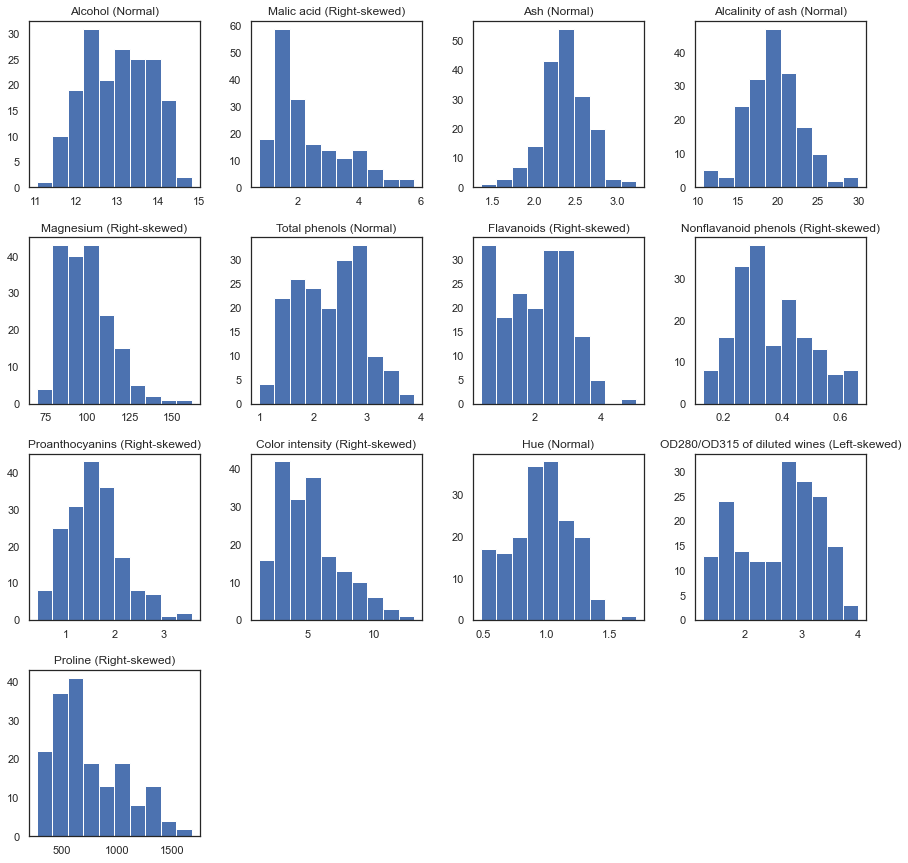

In [38]:
#Q5 Create histograms for each feature and determine their distribution style (skewed, normal).
q5_df = df.drop(['Type'], axis=1)
#renaming cols
new_col = []
d = [1,0,1,1,0,1,0,0,0,0,1,2,0]
for i in range(len(q5_df.columns)): 
  
  if d[i] == 0: 
    text = " (Right-skewed)"
  elif d[i] == 1: 
    text = " (Normal)"
  elif d[i] == 2: 
    text = " (Left-skewed)"
  new_col_name = q5_df.columns[i] + text
  new_col.append(new_col_name)
new_col
q5_df.columns = new_col
hist= q5_df.hist(bins=10, figsize=(15,15), grid=False)

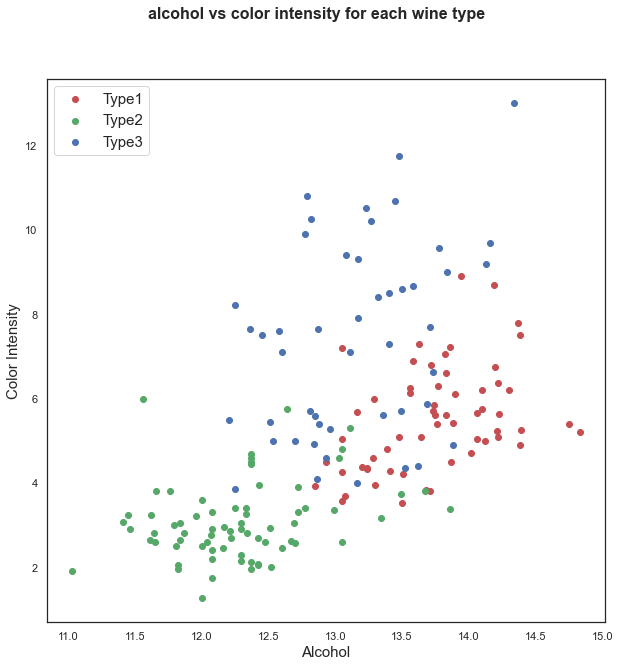

In [39]:
#6 Create a scatter plot alcohol vs color intensity and use different color code for each type.
colors = ['r', 'g', 'b']
label = ['Type1', 'Type2', 'Type3']
fig = plt.figure(figsize=(10,10))
for i in range(1,len(df['Type'].unique())+1): 
  plt.scatter(df['Alcohol'][df['Type'] == i], df['Color intensity'][df['Type'] == i], color=colors[i-1])
plt.legend(label, fontsize=15)
fig.suptitle('alcohol vs color intensity for each wine type', fontsize=16, fontweight='bold')
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Color Intensity', fontsize=15)
plt.show()

In [40]:
#PART TWO 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(open('imports-85.data', "r"), names=headers, na_values='?')

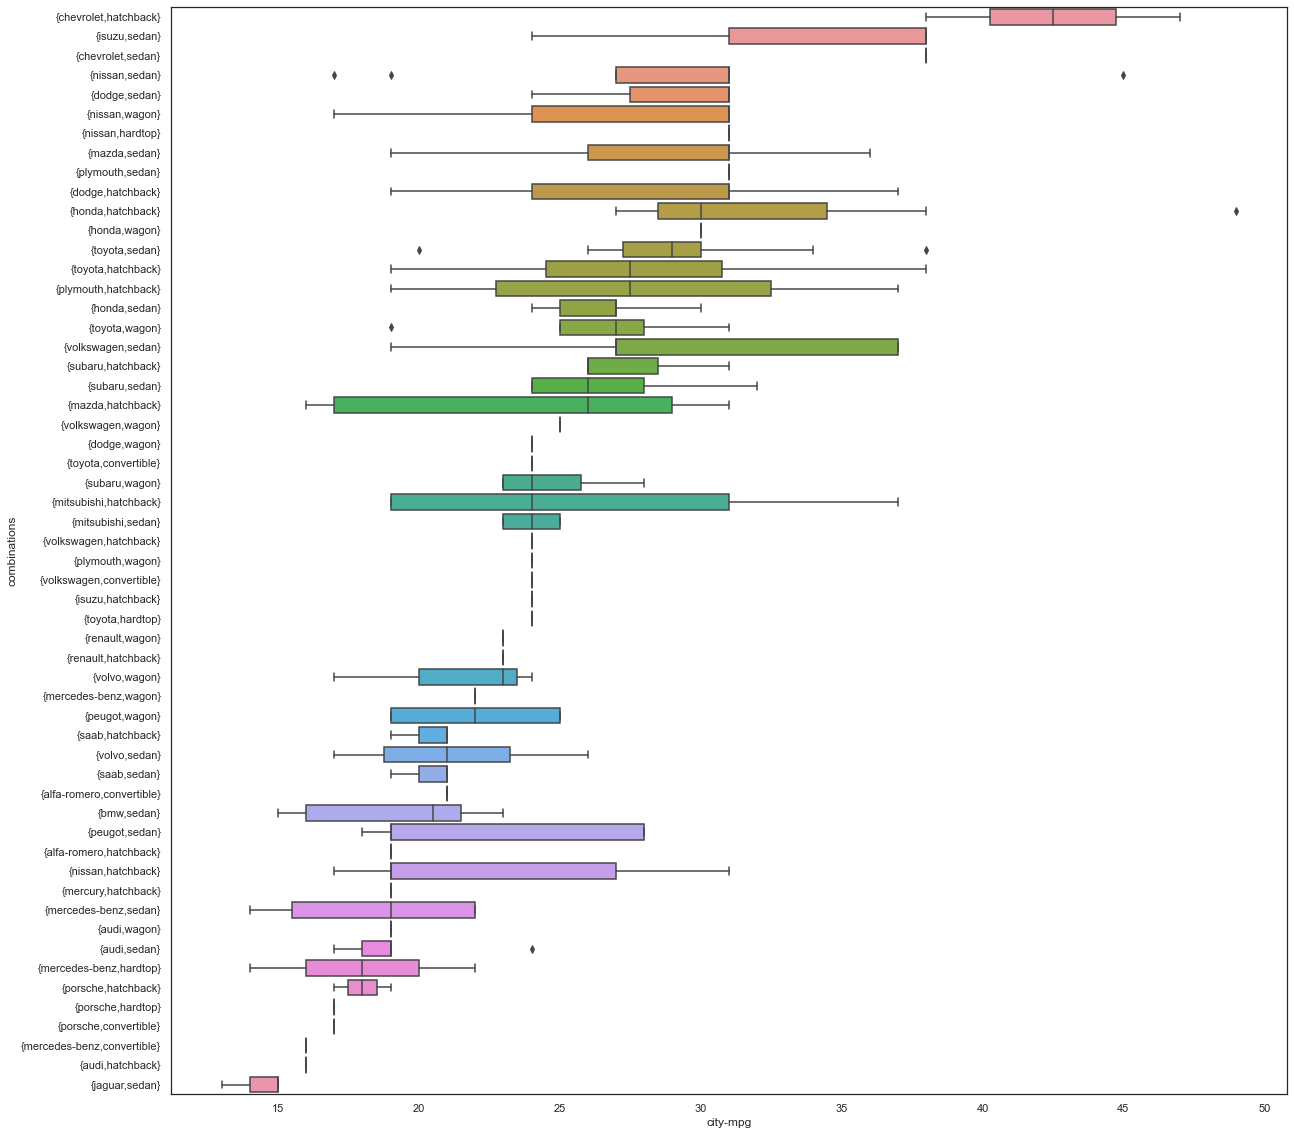

In [41]:
#Q1 Are there certain combinations of make and body-styles that have high city-mpg?
pd.options.mode.chained_assignment = None 
q1_df = df[['make', 'body-style', 'city-mpg']]
q1_df['combinations'] = "{"+ q1_df['make'] +","+q1_df['body-style']+"}"
order = q1_df.groupby("combinations")['city-mpg'].median().sort_values(ascending=False)[::].index
plt.figure(figsize=(20,20))
sns.boxplot(data=q1_df,y ='combinations',x='city-mpg', order=order)
plt.show()

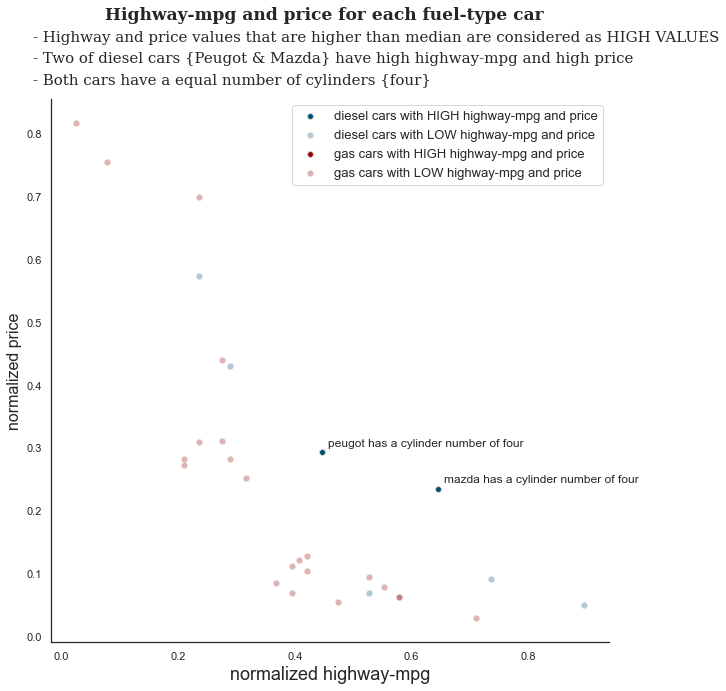

In [51]:
#Q2 When looking at cars with the diesel and gas fuel-types, do either of these fuel types 
#have cars with high highway-mpg and high price? Approximately, 
#which fuel-type has more cars in the of high highway-mpg and high price region? 
#Among those cars what is the lowest num-of-cylinders value?
#ascending by highway and price 


q2_df = df[['fuel-type','make', 'highway-mpg', 'price', 'num-of-cylinders']]
#normalize
cols_to_norm = ['highway-mpg', 'price']
q2_df[cols_to_norm] = q2_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

fueltype = q2_df.groupby(['fuel-type','make'])['highway-mpg', 'price'].median()
diesel_cars = fueltype.loc['diesel']
gas_cars = fueltype.loc['gas']
#median of highway-mpg of all cars and median of price of all cars 
highway_med = q2_df['highway-mpg'].median()
price_med = q2_df['price'].median()
# print("median of highway-mpg and price",highway_med, price_med)

d_h = diesel_cars[(diesel_cars['highway-mpg'] >= highway_med) & (diesel_cars['price'] >= price_med)]
d_l = diesel_cars[(diesel_cars['highway-mpg'] < highway_med) | (diesel_cars['price'] < price_med)]
g_h = gas_cars[(gas_cars['highway-mpg'] >= highway_med) & (gas_cars['price'] >= price_med)]
g_l = gas_cars[(gas_cars['highway-mpg'] < highway_med) | (gas_cars['price'] < price_med)]

#for labeling points
text = d_h.index
q2_df['num-of-cylinders'].loc[q2_df.make=='peugot'].values[0]
text
new_text = []
for txt in text: 
  num_cy = q2_df['num-of-cylinders'].loc[q2_df.make=='peugot'].values[0]
  new_text.append(txt + " has a cylinder number of " + num_cy)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(d_h['highway-mpg'], d_h['price'], c='#004c70', edgecolors='lightgray', label='diesel cars with HIGH highway-mpg and price')
d_h['highway-mpg'].tolist()
#label car-make with high highway and price 
for i, txt in enumerate(new_text): 
  ax.annotate(txt, ((d_h['highway-mpg'][i])+0.01, (d_h['price'][i]+0.01)))
ax.scatter(d_l['highway-mpg'], d_l['price'], c='#004c70', alpha=0.3, edgecolors='lightgray', label='diesel cars with LOW highway-mpg and price')
ax.scatter(g_h['highway-mpg'], g_h['price'], c='#990000', edgecolors='lightgray', label='gas cars with HIGH highway-mpg and price')
ax.scatter(g_l['highway-mpg'], g_l['price'], c='#990000', alpha=0.3, edgecolors='lightgray', label='gas cars with LOW highway-mpg and price')

fig.text(0.2, 0.99, "Highway-mpg and price for each fuel-type car", fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.96, "- Highway and price values that are higher than median are considered as HIGH VALUES", fontsize=15, fontfamily='serif')
fig.text(0.1, 0.93, "- Two of diesel cars {Peugot & Mazda} have high highway-mpg and high price", fontsize=15, fontfamily='serif')
fig.text(0.1, 0.90, "- Both cars have a equal number of cylinders {four}", fontsize=15, fontfamily='serif')

plt.xlabel('normalized highway-mpg', fontsize=18)
plt.ylabel('normalized price', fontsize=16)

ax.legend(fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

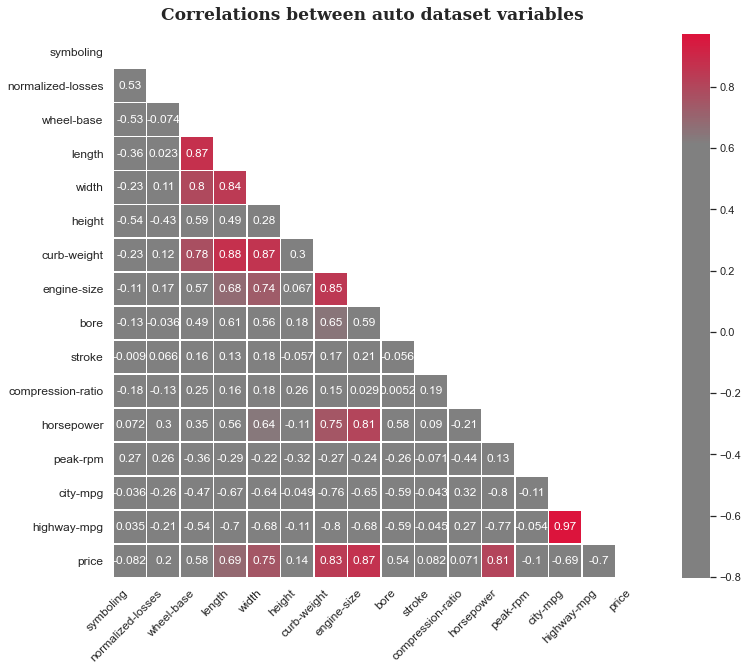

In [43]:
#Q3 Check the correlation between the variables and highlight the highly correlated variables.
sns.set(style="white")
# q3_df = df.drop(['Type'], axis=1).corr()
q3_df = df.corr()
upper = np.triu(q3_df) # the upper triangle of a matrix which will be masked 
fig, ax = plt.subplots(figsize=(12,10)) 
#customize heatmap color 
cmap = LinearSegmentedColormap.from_list('Grey-crimson', ['gray','gray', 'gray','gray', 'gray','crimson'])
sns.heatmap(q3_df, annot=True, cmap=cmap, mask=upper, linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
fig.text(0.18, 0.90, "Correlations between auto dataset variables", fontsize=17, fontweight='bold', fontfamily='serif')
plt.show()

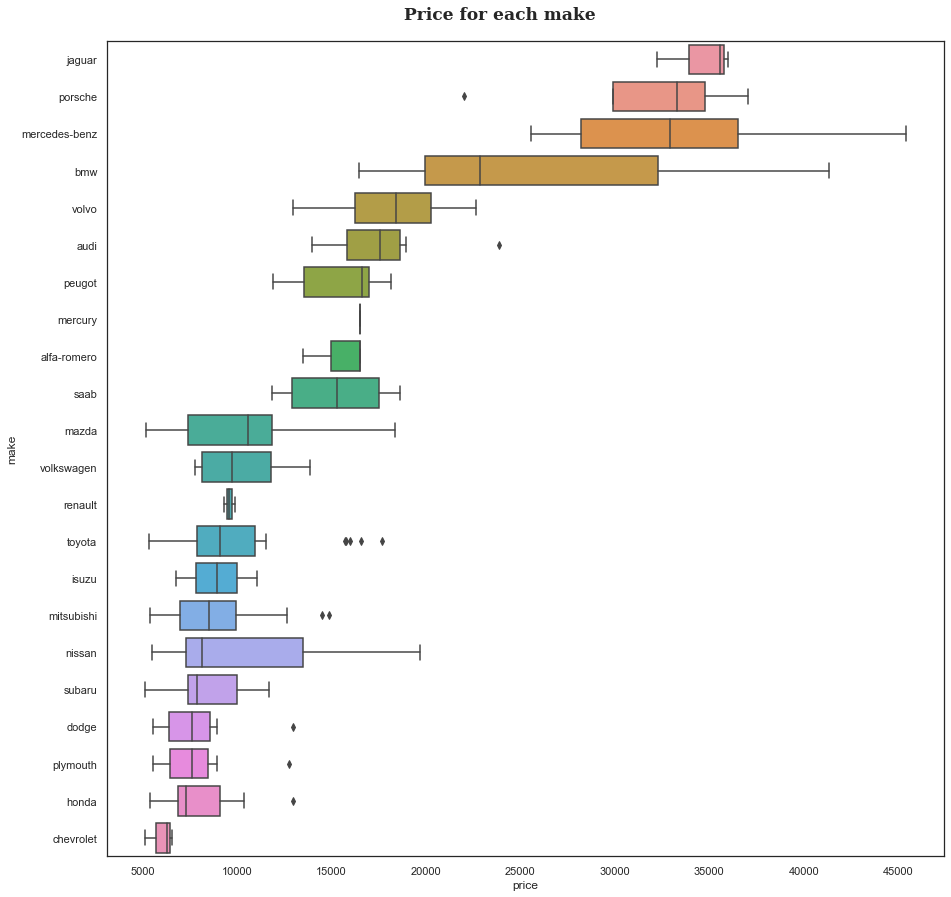

In [44]:
#Q4 Create a multi-box plot visualization with price (x) and make (y).
import matplotlib
q4_df = df[['price', 'make']]
pd.options.mode.chained_assignment = None 
order = q4_df.groupby("make")['price'].median().sort_values(ascending=False)[::].index
fig, ax = plt.subplots(figsize=(15,15)) 
sns.boxplot(data=q4_df,y ='make',x='price', order=order)
fig.text(0.4, 0.90, "Price for each make", fontsize=17, fontweight='bold', fontfamily='serif')
plt.show()